In [35]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
X = pd.read_json('results/2019-06-01T11-36-33/cross.json').T
X.columns = ['α', 'obs_sigma', 'sample_cost', 'switch_cost', 'µ', 'σ']
# X.index = np.arange(-.1, .11, 0.02)

(0.74, 0.8)

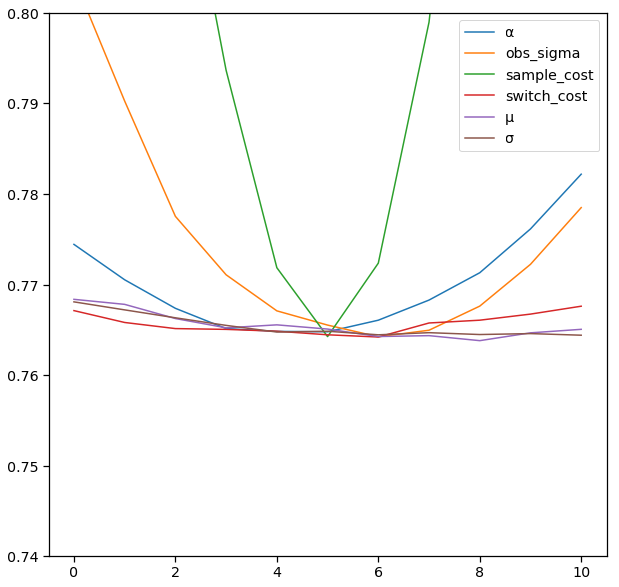

In [48]:
X.plot(figsize=(10,10))
# plt.axvline(0, c='k')
plt.ylim(0.74, 0.8)